In [1]:
import pandas as pd
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding,  Concatenate, Lambda
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import seaborn as sns

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 10.7MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219242 sha256=afe5ee66d653a5a3f4a2acaea61930f2d654de44161f9b4ebd21d6328e13a859
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(3)
print('The data used will be:')
df_train[['Joined']]

The data used will be:


,Joined
0,"[MKD, KDK, DKQ, KQK, QKK, KKK, KKK, KKE, KER, ..."
1,"[MSW, SWS, WSG, SGL, GLL, LLH, LHG, HGL, GLN, ..."
2,"[MSL, SLF, LFD, FDL, DLF, LFR, FRG, RGF, GFF, ..."
3,"[MAV, AVA, VAP, APR, PRL, RLF, LFG, FGG, GGL, ..."
4,"[MST, STI, TIQ, IQS, QSE, SET, ETD, TDC, DCY, ..."
...,...
6265,"[MSY, SYF, YFG, FGE, GEH, EHF, HFW, FWG, WGE, ..."
6266,"[MTV, TVG, VGK, GKS, KSS, SSK, SKM, KML, MLQ, ..."
6267,"[MNN, NNL, NLS, LSF, SFS, FSE, SEL, ELC, LCC, ..."
6268,"[MAP, APE, PEI, EIN, INL, NLP, LPG, PGP, GPM, ..."


Median length of Human sequence is 477


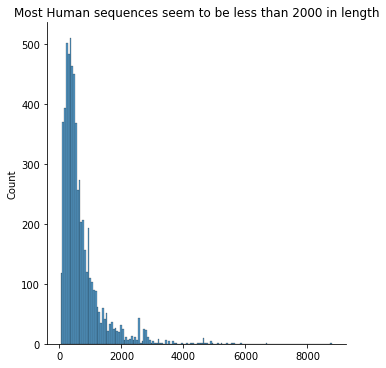

In [ ]:
lengths = sorted(len(s) for s in df_train['Human'])
print("Median length of Human sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Human sequences seem to be less than 2000 in length")

Median length of Yersinia sequence is 334


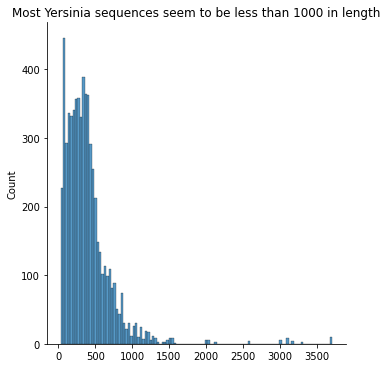

In [ ]:
lengths = sorted(len(s) for s in df_train['Yersinia'])
print("Median length of Yersinia sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Yersinia sequences seem to be less than 1000 in length")

MAX_VOCAB_SIZE is 7000
MAX_SEQUENCE_LENGTH is 1000
max sequence_data length: 8799
min sequence_data length: 103
median sequence_data length: 860


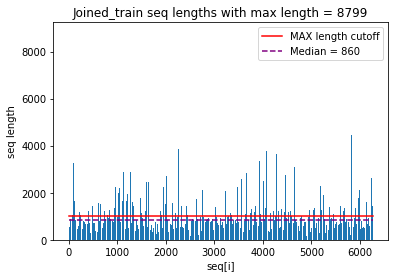

max word index: 6999
Found 8000 unique tokens.
pre padding.
Shape of data tensor: (6270, 1000)
max sequences_test length: 6020
min sequences_test length: 129
median sequences_test length: 883


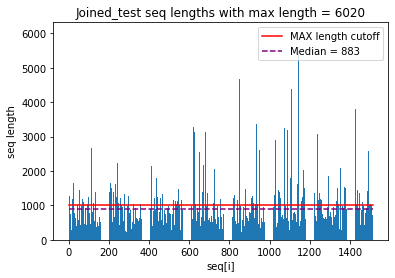

pre padding for test seq.
Shape of data_test tensor: (1514, 1000)
num_words is 7000


In [3]:
data_1D_join_pre,data_test_1D_join_pre,num_words_1D_join,MAX_SEQUENCE_LENGTH_1D_J,MAX_VOCAB_SIZE_1D = f.get_seq_data_join(7000,1000,df_train,df_test, pad='pre', show=True)

In [4]:
data_1D_join_center,data_test_1D_join_center,num_words_1D_join,MAX_SEQUENCE_LENGTH_1D_J,MAX_VOCAB_SIZE_1D = f.get_seq_data_join(7000,1000,df_train,df_test, pad='center')

MAX_VOCAB_SIZE is 7000
MAX_SEQUENCE_LENGTH is 1000
max sequence_data length: 8799
min sequence_data length: 103
median sequence_data length: 860
max word index: 6999
Found 8000 unique tokens.
Center padding.
Shape of data tensor: (6270, 1000)
max sequences_test length: 6020
min sequences_test length: 129
median sequences_test length: 883
Center padding for test seq.
Shape of data_test tensor: (1514, 1000)
num_words is 7000


In [5]:
data_1D_join_post,data_test_1D_join_post,num_words_1D_join,MAX_SEQUENCE_LENGTH_1D_J,MAX_VOCAB_SIZE_1D = f.get_seq_data_join(7000,1000,df_train,df_test, pad='post')

MAX_VOCAB_SIZE is 7000
MAX_SEQUENCE_LENGTH is 1000
max sequence_data length: 8799
min sequence_data length: 103
median sequence_data length: 860
max word index: 6999
Found 8000 unique tokens.
post padding.
Shape of data tensor: (6270, 1000)
max sequences_test length: 6020
min sequences_test length: 129
median sequences_test length: 883
post padding for test seq.
Shape of data_test tensor: (1514, 1000)
num_words is 7000


MAX_VOCAB_SIZE is 7000
MAX_SEQUENCE_LENGTH is 1000
max sequences1_train length: 8624
min sequences1_train length: 37
median sequences1_train length: 467


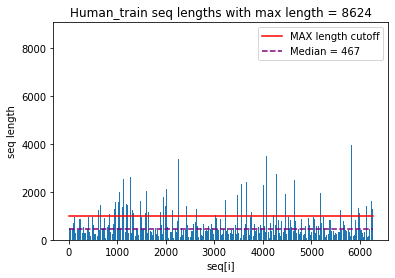

max word index sequences1_train: 6999
max sequences2_train length: 3704
min sequences2_train length: 29
median sequences2_train length: 329


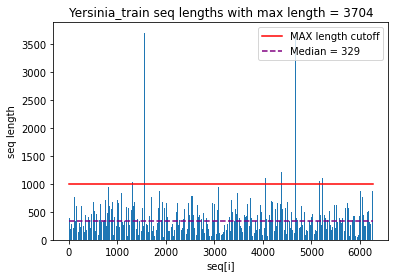

max word index sequences2_train: 6999
Found 8000 unique tokens in tokenizer1.
Found 7998 unique tokens in tokenizer2.
pre padding
Shape of data1 tensor: (6270, 1000)
Shape of data2 tensor: (6270, 1000)
max test_sequences1 length: 5530
min test_sequences1 length: 37
median test_sequences1 length: 484


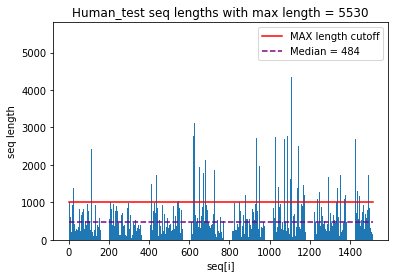

max test_sequences2 length: 3704
min test_sequences2 length: 29
median test_sequences2 length: 324


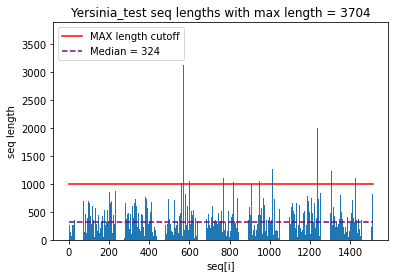

pre padding for test seq.
Shape of test_data1 tensor: (1514, 1000)
Shape of test_data2 tensor: (1514, 1000)
num_words is 7000


In [6]:
data1_1D_doubleip_pre,data2_1D_doubleip_pre,data1_test_1D_doubleip_pre,data2_test_1D_doubleip_pre,num_words_1D,MAX_SEQUENCE_LENGTH_1D_dIP,MAX_VOCAB_SIZE_1D = f.get_seq_data_doubleip(7000,1000,df_train,df_test,pad = 'pre', show=True)

In [7]:
data1_1D_doubleip_center,data2_1D_doubleip_center,data1_test_1D_doubleip_center,data2_test_1D_doubleip_center,num_words_1D,MAX_SEQUENCE_LENGTH_1D_dIP,MAX_VOCAB_SIZE_1D = f.get_seq_data_doubleip(7000,1000,df_train,df_test)

MAX_VOCAB_SIZE is 7000
MAX_SEQUENCE_LENGTH is 1000
max sequences1_train length: 8624
min sequences1_train length: 37
median sequences1_train length: 467
max word index sequences1_train: 6999
max sequences2_train length: 3704
min sequences2_train length: 29
median sequences2_train length: 329
max word index sequences2_train: 6999
Found 8000 unique tokens in tokenizer1.
Found 7998 unique tokens in tokenizer2.
Center padding
Shape of data1 tensor: (6270, 1000)
Shape of data2 tensor: (6270, 1000)
max test_sequences1 length: 5530
min test_sequences1 length: 37
median test_sequences1 length: 484
max test_sequences2 length: 3704
min test_sequences2 length: 29
median test_sequences2 length: 324
Center padding for test seq.
Shape of test_data1 tensor: (1514, 1000)
Shape of test_data2 tensor: (1514, 1000)
num_words is 7000


In [8]:
data1_1D_doubleip_post,data2_1D_doubleip_post,data1_test_1D_doubleip_post,data2_test_1D_doubleip_post,num_words_1D,MAX_SEQUENCE_LENGTH_1D_dIP,MAX_VOCAB_SIZE_1D = f.get_seq_data_doubleip(7000,1000,df_train,df_test,pad = 'post')

MAX_VOCAB_SIZE is 7000
MAX_SEQUENCE_LENGTH is 1000
max sequences1_train length: 8624
min sequences1_train length: 37
median sequences1_train length: 467
max word index sequences1_train: 6999
max sequences2_train length: 3704
min sequences2_train length: 29
median sequences2_train length: 329
max word index sequences2_train: 6999
Found 8000 unique tokens in tokenizer1.
Found 7998 unique tokens in tokenizer2.
post padding
Shape of data1 tensor: (6270, 1000)
Shape of data2 tensor: (6270, 1000)
max test_sequences1 length: 5530
min test_sequences1 length: 37
median test_sequences1 length: 484
max test_sequences2 length: 3704
min test_sequences2 length: 29
median test_sequences2 length: 324
post padding for test seq.
Shape of test_data1 tensor: (1514, 1000)
Shape of test_data2 tensor: (1514, 1000)
num_words is 7000


In [9]:
EMBEDDING_DIM_1D = 5
DROP = 0.2
BATCH_SIZE = 128
EPOCHS = 10
M_1D=10



x1_join = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_1D_J,EMBEDDING_DIM_1D,num_words_1D,M_1D,DROP)
x2_join = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_1D_J,EMBEDDING_DIM_1D,num_words_1D,M_1D,DROP)
x3_join = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_1D_J,EMBEDDING_DIM_1D,num_words_1D,M_1D,DROP)

x1_doubleip = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_1D_dIP,EMBEDDING_DIM_1D,num_words_1D,M_1D,DROP)
x2_doubleip = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_1D_dIP,EMBEDDING_DIM_1D,num_words_1D,M_1D,DROP)
x3_doubleip = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_1D_dIP,EMBEDDING_DIM_1D,num_words_1D,M_1D,DROP)
x4_doubleip = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_1D_dIP,EMBEDDING_DIM_1D,num_words_1D,M_1D,DROP)
x5_doubleip = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_1D_dIP,EMBEDDING_DIM_1D,num_words_1D,M_1D,DROP)
x6_doubleip = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_1D_dIP,EMBEDDING_DIM_1D,num_words_1D,M_1D,DROP)

concatenator = Concatenate(axis=1)
x = concatenator([x1_join.output, x2_join.output, x3_join.output, x1_doubleip.output, x2_doubleip.output, x3_doubleip.output, x4_doubleip.output, x5_doubleip.output, x6_doubleip.output])
x = Dense(128)(x)
x = Dropout(0.2)(x)
output = Dense(1, activation="sigmoid",name="Final")(x)
model1D_combine = Model(inputs=[x1_join.input, x2_join.input, x3_join.input, x1_doubleip.input, x2_doubleip.input, x3_doubleip.input, x4_doubleip.input, x5_doubleip.input, x6_doubleip.input], outputs=output)

model1D_combine.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])


trains = [data_1D_join_pre,data_1D_join_center,data_1D_join_post, data1_1D_doubleip_pre,data1_1D_doubleip_center,data1_1D_doubleip_post, data2_1D_doubleip_pre,data2_1D_doubleip_center,data2_1D_doubleip_post]
tests = [data_test_1D_join_pre,data_test_1D_join_center,data_test_1D_join_post, data1_test_1D_doubleip_pre,data1_test_1D_doubleip_center,data1_test_1D_doubleip_post, data2_test_1D_doubleip_pre,data2_test_1D_doubleip_center,data2_test_1D_doubleip_post]

jk = model1D_combine.fit(trains, df_train['label'].values, epochs=EPOCHS, validation_data=(tests,df_test['label'].values),batch_size=BATCH_SIZE)
print(roc_auc_score(df_test['label'].values, model1D_combine.predict(tests)))


Epoch 1/10
49/49 [==============================] - 105s 1s/step - loss: 1.3372 - accuracy: 0.5180 - val_loss: 0.6534 - val_accuracy: 0.5588
Epoch 2/10
49/49 [==============================] - 53s 1s/step - loss: 0.5761 - accuracy: 0.6969 - val_loss: 0.5294 - val_accuracy: 0.7490
Epoch 3/10
49/49 [==============================] - 53s 1s/step - loss: 0.4090 - accuracy: 0.8193 - val_loss: 0.5207 - val_accuracy: 0.7649
Epoch 4/10
49/49 [==============================] - 53s 1s/step - loss: 0.3271 - accuracy: 0.8580 - val_loss: 0.4802 - val_accuracy: 0.7787
Epoch 5/10
49/49 [==============================] - 53s 1s/step - loss: 0.2319 - accuracy: 0.9034 - val_loss: 0.5033 - val_accuracy: 0.7655
Epoch 6/10
49/49 [==============================] - 53s 1s/step - loss: 0.1668 - accuracy: 0.9298 - val_loss: 0.4965 - val_accuracy: 0.7867
Epoch 7/10
49/49 [==============================] - 53s 1s/step - loss: 0.0781 - accuracy: 0.9711 - val_loss: 0.7099 - val_accuracy: 0.7715
Epoch 8/10
49/49 [=

In [ ]:
#model1D_doubleip.save('/content/drive/MyDrive/ML_Data/model1D_doubleip.h5')0.86131